# Data Map

### **Variables :**

**1. RowNumber** — corresponds to the record (row) number and has no effect on the output. This column will be removed.

**2. CustomerId** — contains random values and has no effect on customer leaving the bank. This column will be removed.

**3. Surname** — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

**4. CreditScore** — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

**5. Geography** — a customer’s location can affect their decision to leave the bank. We’ll keep this column.
Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.

**6. Age** — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

**7. Tenure** — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

**8. Balance** — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

**9. NumOfProducts** — refers to the number of products that a customer has purchased through the bank.

**10. HasCrCard** — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)

**11. IsActiveMember** — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)

**12. EstimatedSalary** — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**13 Exited** — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)


# Import the Librairies

In [150]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Import the data

In [60]:
data = pd.read_csv(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\Churn_Modelling (1).csv')

# Explore the data from an bird's-eye view

Things we will be looking for:

What the dataset looks like?
What are the data types?
Which columns contain the features of the websites?
Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

In [61]:
# Print the first 5 rows:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [62]:
# Print the last 5 rows:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [63]:
data.shape

(10000, 14)

In [64]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [65]:
# We can drop 3 columns that have no impact on the customer decision to leave the bank: 'RowNumber', 'CustomerId' and 'Surname'
data.drop(columns = ['RowNumber', 'CustomerId' ,'Surname'], inplace = True)

In [66]:
# Data types
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Comments: We have 2 columns with categorical data, 'Geography' and 'Gender'. The others are float or integers.

In [67]:
# Describe of our data excluding the categorical data
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### The column 'Exited' contains the feature we will predict.

In [68]:
data['Exited'].value_counts() 

0    7963
1    2037
Name: Exited, dtype: int64

Comments: We have 10000 rows. The data has two classes: 0 and 1 represents whether or not the customer left the bank.

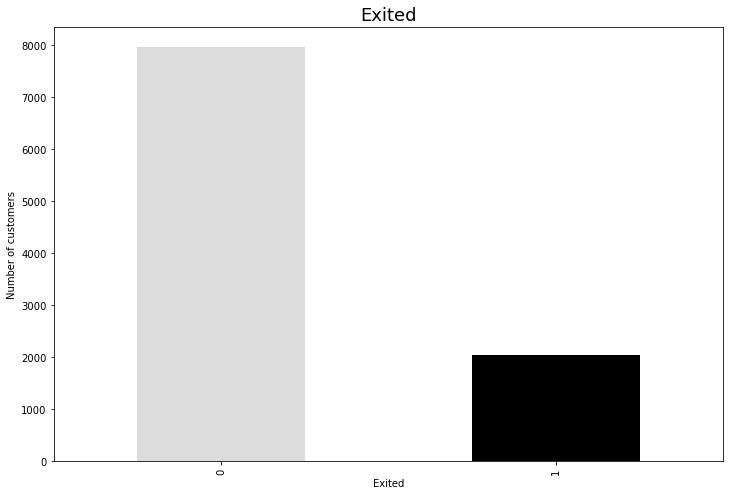

<Figure size 432x288 with 0 Axes>

In [185]:
# Plotting the distribution of the classes will give us insights about the imbalance if present
plt.figure(figsize = (12,8))
data['Exited'].value_counts().plot.bar(color = ['gainsboro','black'])
plt.title('Exited', fontsize = 18)
plt.xlabel("Exited", fontsize = 10)
plt.ylabel("Number of customers", fontsize = 10)
plt.show()
plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\Exited_Imbalanced.png')

C:\Users\Ingrid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



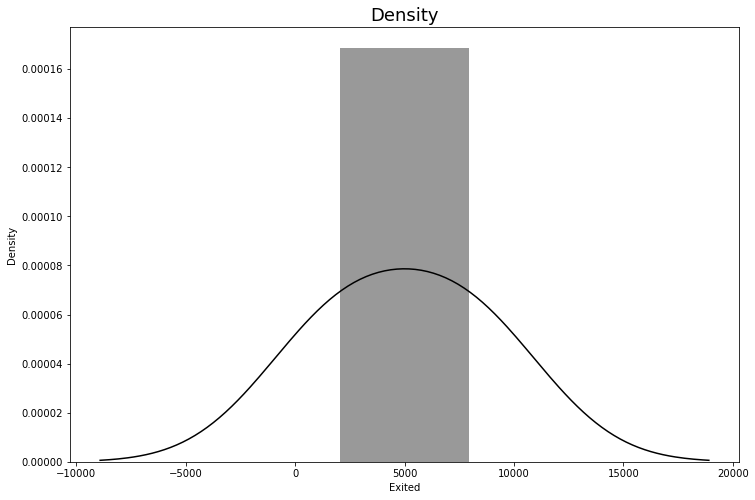

<Figure size 432x288 with 0 Axes>

In [157]:
plt.figure(figsize = (12,8))
sns.distplot(data.Exited.value_counts(), color = 'black')
plt.title('Density', fontsize = 18)
plt.show()
plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\Exited_Imbalanced_Density.png')

Comments: There is an imbalance between 0 and 1 at the target feature. We will have to balanced to use our Machine Learning models.

#### Let's handle categorical data:
* Geography
* Gender

##### Column 'Geography'

In [71]:
# 3 Countries
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

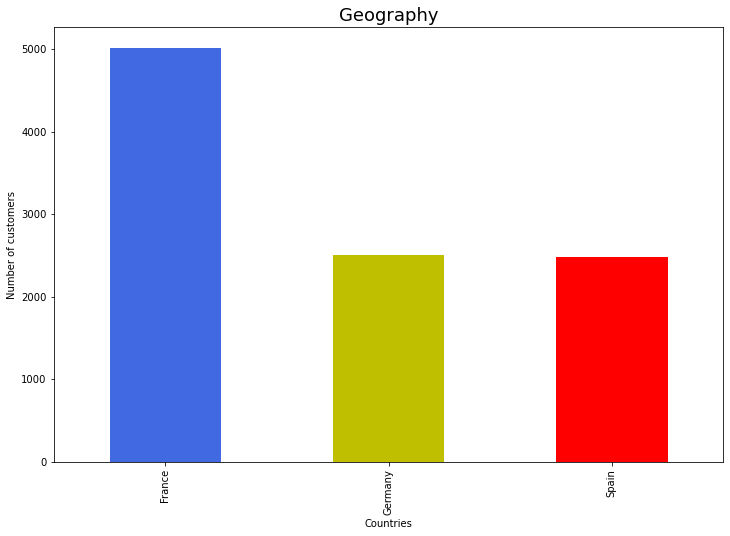

<Figure size 432x288 with 0 Axes>

In [183]:
plt.figure(figsize = (12,8))
data['Geography'].value_counts().plot.bar(color = ['royalblue','y','r'])
plt.title('Geography', fontsize = 18)
plt.xlabel("Countries", fontsize = 10)
plt.ylabel("Number of customers", fontsize = 10)
plt.show()
plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\EDA_Countries.png')

Comments: There is more customers in France than in Germany and Spain. Almost 50 % of the customers live in France.

##### Column 'Gender'

In [73]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

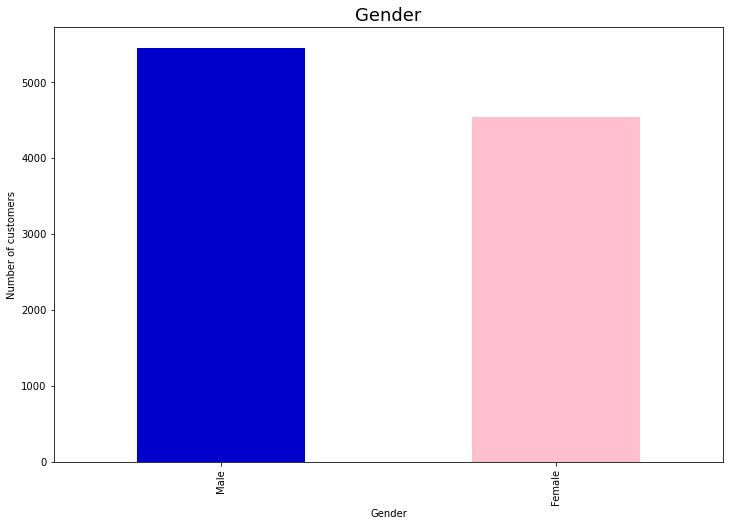

<Figure size 432x288 with 0 Axes>

In [182]:
plt.figure(figsize = (12,8))
data['Gender'].value_counts().plot.bar(color = ['mediumblue','pink'])
plt.title('Gender', fontsize = 18)
plt.xlabel("Gender", fontsize = 10)
plt.ylabel("Number of customers", fontsize = 10)
plt.show()
plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\EDA_Gender.png')

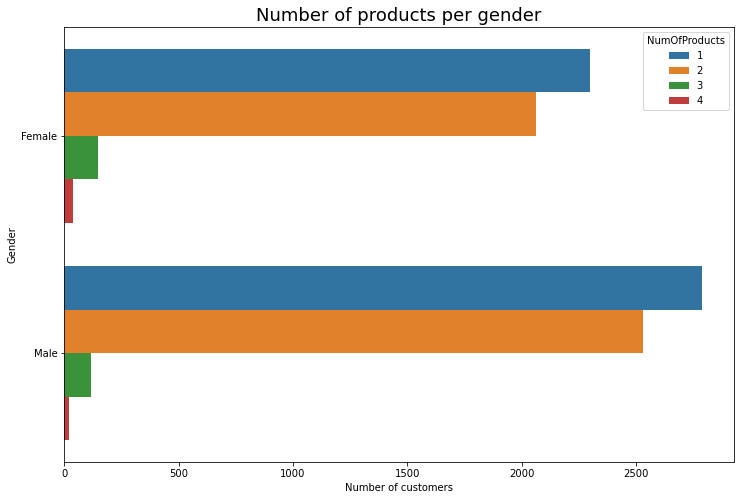

In [168]:
plt.figure(figsize = (12,8))
sns.countplot(y = 'Gender', hue = 'NumOfProducts', data = data)
plt.title('Number of products per gender', fontsize = 18)
plt.xlabel('Number of customers',fontsize = 10)
data['Gender'].value_counts()
plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\EDA_NumOfProducts_per_gender.png')

Comments: The above graph shows that males tend to get more products than females.

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

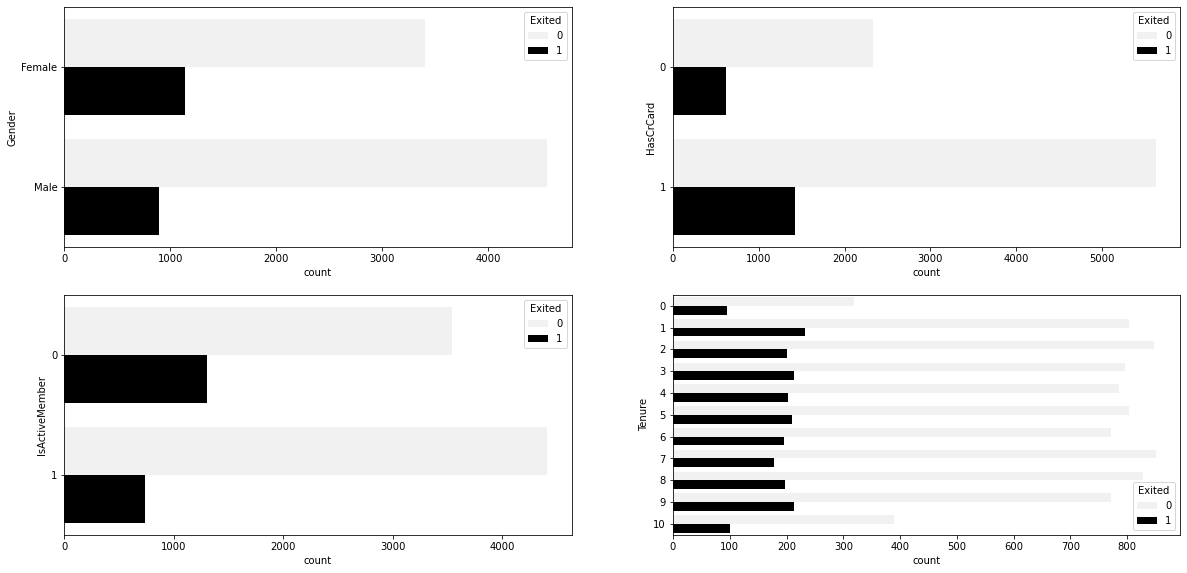

In [179]:
plt.figure(figsize = (20,15))

# Subplots
plt.subplot(321)
colors = ['black', 'b']
sns.countplot(y = 'Gender', hue = 'Exited', data = data, color =  'black')
data['Gender'].value_counts()

plt.subplot(322)
sns.countplot(y = 'HasCrCard', hue = 'Exited', data = data, color =  'black')
data['HasCrCard'].value_counts()

plt.subplot(323)
sns.countplot(y = 'IsActiveMember', hue = 'Exited', data = data, color =  'black')
data['IsActiveMember'].value_counts()

plt.subplot(324)
sns.countplot(y = 'Tenure', hue = 'Exited', data = data, color =  'black')
data['Tenure'].value_counts()

plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\EDA_Subplots.png')

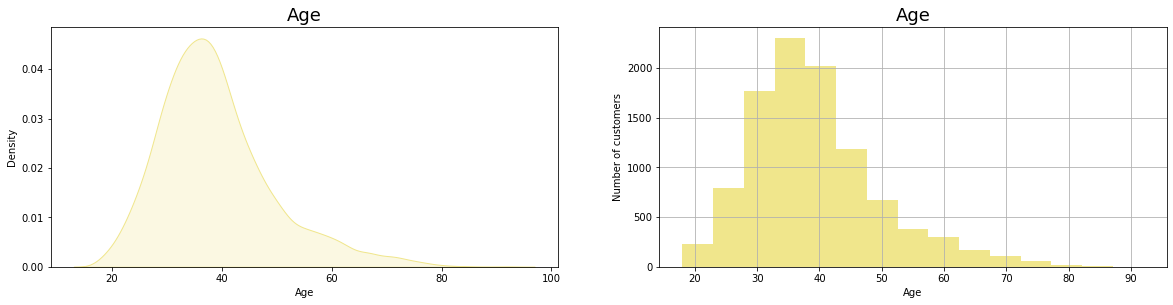

<Figure size 432x288 with 0 Axes>

In [203]:
plt.figure(figsize = (20,15))

plt.subplot(321)
sb.kdeplot(data['Age'], color = 'khaki', shade = True)
plt.title('Age', fontsize = 18)
plt.xlabel("Age", fontsize = 10)
plt.ylabel("Density", fontsize = 10)

plt.subplot(322)
data['Age'].hist(bins=15, color = 'khaki')
plt.title('Age', fontsize = 18)
plt.xlabel("Age", fontsize = 10)
plt.ylabel("Number of customers", fontsize = 10)

plt.show()
plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\EDA_Distribution_Age.png')

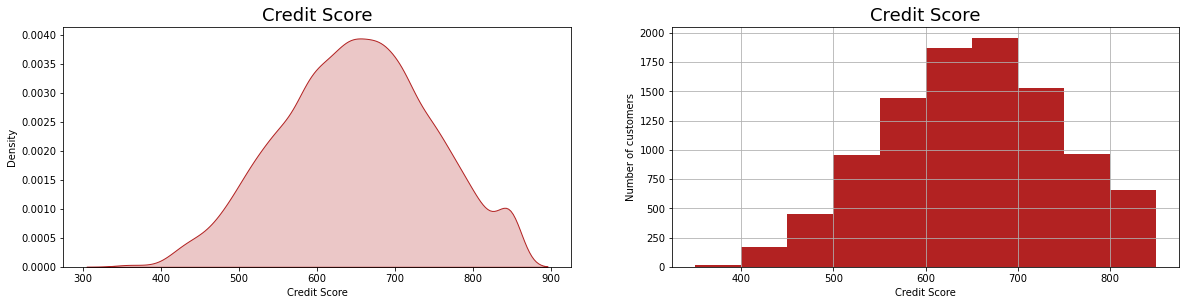

In [202]:
plt.figure(figsize = (20,15))

plt.subplot(321)
sb.kdeplot(data['CreditScore'], color = 'firebrick', shade = True)
plt.title('Credit Score', fontsize = 18)
plt.xlabel("Credit Score",  fontsize = 10)
plt.ylabel("Density", fontsize = 10)


plt.subplot(322)
data['CreditScore'].hist(color = 'firebrick')
plt.title('Credit Score', fontsize = 18)
plt.xlabel("Credit Score", fontsize = 10)
plt.ylabel("Number of customers", fontsize = 10)
plt.xlabel("Credit Score");

plt.show
plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\EDA_CreditScore.png')

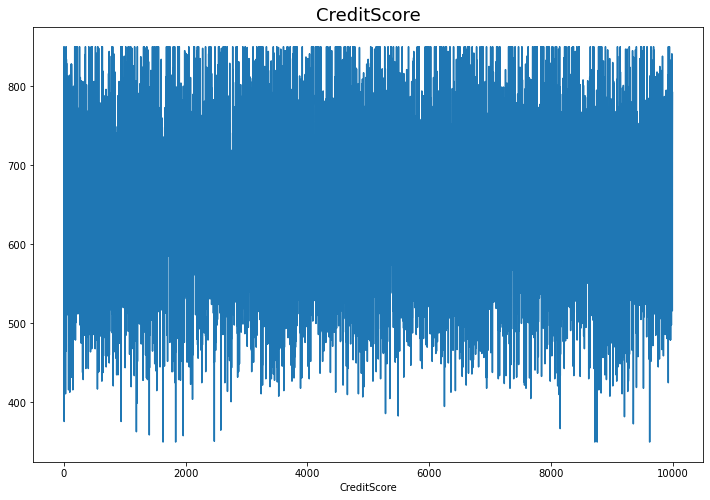

In [79]:
plt.figure(figsize = (12,8))
plt.plot(data['CreditScore'])
plt.title('CreditScore', fontsize = 18)
plt.xlabel("CreditScore");
plt.show()

In [19]:
# save the data in the seprate file before encoding
data.to_csv(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\churn_clean.csv', index = False)

The data is highly imbalanced. We are going to make it balanced with the undersampling method that is not working with categorical data so we need to Encode our data.


# Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

lbl_ebcode = LabelEncoder()

data.Geography = lbl_ebcode.fit_transform(data.Geography)
data.Gender = lbl_ebcode.fit_transform(data.Gender)

In [21]:
# Print the first 5 rows of the encoded dataset
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [22]:
# Print the last 5 rows of the encoded dataset
data.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1
9999,792,0,0,28,4,130142.79,1,1,0,38190.78,0


Before changing the dataset, we must split the dataset into training and testing because the change is only for the training purpose.

In [23]:
# We define X and y
X= data.drop('Exited', axis=1)
y=data['Exited']


# We split the dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, 
random_state = 2, shuffle = True, stratify = y)

In [24]:
#pip install imblearn

In [25]:
# We import the undersampling module
from imblearn.under_sampling import ClusterCentroids

undersampler = ClusterCentroids()

In [26]:
X_res, y_res = undersampler.fit_resample(X_train, y_train)

In [27]:
# Our sample is balanced 
y_res.value_counts()


0    1365
1    1365
Name: Exited, dtype: int64

In [28]:
# We decide to balance all our dataset
undersampler = ClusterCentroids()
X_new, y_new = undersampler.fit_resample(X, y)
X_new["Target"]=y_new

# We create a new dataframe with balanced data
data_new=X_new

In [29]:
# Print the first 5 rows of the new balanced dataframe
data_new.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Target
0,598,1,0,35,2,160025.100,1,0,0,57483.365000,0
1,642,0,0,39,5,0.000,1,0,0,103662.883500,0
2,597,1,0,35,3,110420.205,1,0,0,141273.465000,0
3,651,0,0,38,5,0.000,1,0,0,16007.925789,0
4,648,0,0,33,9,113145.420,1,1,0,34014.046667,0


In [30]:
# We check if we really have balanced data
data_new['Target'].value_counts()


0    2037
1    2037
Name: Target, dtype: int64

In [31]:
# We check the shape of our new dataframe
data_new.shape

(4074, 11)

We lost a lot of information, almost 50% of our dataset: 10000- 4074 = 5926 rows.

In [32]:
# Check if we have missing values
data_new.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Target             0
dtype: int64

There is no missing values.

In [33]:
# Check if we have any duplicate
data_new.duplicated().sum()

0

There is no duplicate.

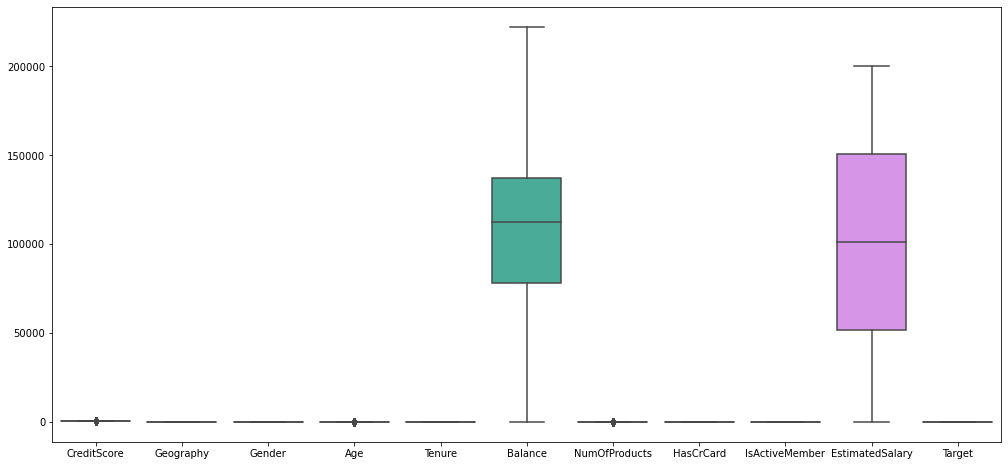

<Figure size 432x288 with 0 Axes>

In [204]:
#Check if we have any outliers
f, ax = plt.subplots(figsize=(17, 8))
sns.boxplot(data=data_new)
plt.show()
plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\Outliers_1.png')

According to the boxplot, We have 2 outliers.

In [41]:
data_new.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Target
count,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4.074000e+03,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000
mean,649.232204,0.644575,0.359597,41.011291,4.824251,1.007254e+05,1.302651,0.553019,0.316397,100927.779117,0.500000
std,85.427091,0.705168,0.479941,9.317483,2.531421,5.379169e+04,0.638758,0.497242,0.465127,57901.232331,0.500061
min,350.000000,0.000000,0.000000,18.000000,0.000000,-1.455192e-11,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.250000,0.000000,0.000000,34.000000,3.000000,7.791759e+04,1.000000,0.000000,0.000000,51652.805000,0.000000
50%,651.000000,1.000000,0.000000,39.000000,5.000000,1.122859e+05,1.000000,1.000000,0.000000,101247.925000,0.500000
75%,703.000000,1.000000,1.000000,47.000000,7.000000,1.371283e+05,1.000000,1.000000,1.000000,150810.798000,1.000000
max,850.000000,2.000000,1.000000,84.000000,10.000000,2.508981e+05,4.000000,1.000000,1.000000,199929.170000,1.000000


In [43]:
print('Maximum of Balance: ', data_new['Balance'].max()

250898.09

In [46]:
data_new = data_new[data_new.Balance != data_new['Balance'].max()]

In [48]:
data_new.shape

(4073, 11)

We delete the first outliers so we have to repeat the action.

In [49]:
print('Maximum of Balance: ', data_new['Balance'].max())
data_new = data_new[data_new.Balance != data_new['Balance'].max()]
data_new.shape

Maximum of Balance:  238387.56


(4072, 11)

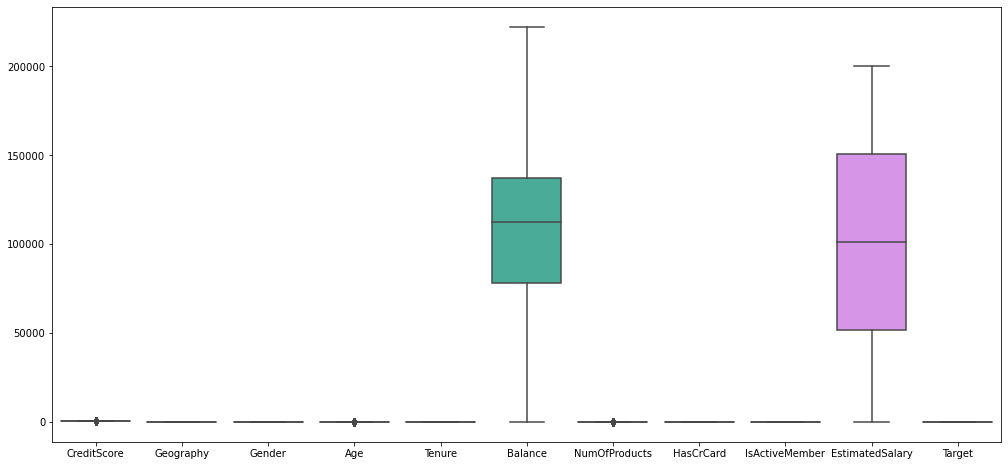

<Figure size 432x288 with 0 Axes>

In [205]:
#Check if we still have any outliers
f, ax = plt.subplots(figsize=(17, 8))
sns.boxplot(data=data_new)
plt.show()
plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\Outliers_2.png')

Now we have a datafranme with 4072 rows and 11 columns.

# Correlation

Next, we evaluate if the columns in this dataset are strongly correlated with 2 steps:
1 - a correlation matrix using the numeric columns in the dataset.
2 - a heatmap using seaborn to visualize which columns have high collinearity.


In [51]:
#Correlation matrix
corr = data_new.corr()
corr 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Target
CreditScore,1.000000,-0.004279,-0.009798,-0.029647,0.017280,0.017389,-0.000208,-0.018159,0.003630,-0.027717,-0.045273
Geography,-0.004279,1.000000,0.102082,0.087886,-0.015854,0.071902,0.094841,0.117851,0.083671,-0.005937,0.227611
Gender,-0.009798,0.102082,1.000000,0.087032,0.024864,0.046687,0.038022,0.152334,0.082871,-0.002194,0.169252
Age,-0.029647,0.087886,0.087032,1.000000,-0.000075,-0.092845,0.109377,0.116438,0.092289,-0.000404,0.410665
Tenure,0.017280,-0.015854,0.024864,-0.000075,1.000000,0.017461,0.027548,0.034528,-0.014807,0.029298,0.043234
Balance,0.017389,0.071902,0.046687,-0.092845,0.017461,1.000000,-0.052859,0.012680,0.024963,-0.008435,-0.180478
NumOfProducts,-0.000208,0.094841,0.038022,0.109377,0.027548,-0.052859,1.000000,0.114464,0.100076,0.027929,0.269950
HasCrCard,-0.018159,0.117851,0.152334,0.116438,0.034528,0.012680,0.114464,1.000000,0.078531,-0.021516,0.294460
IsActiveMember,0.003630,0.083671,0.082871,0.092289,-0.014807,0.024963,0.100076,0.078531,1.000000,-0.018309,0.094882
EstimatedSalary,-0.027717,-0.005937,-0.002194,-0.000404,0.029298,-0.008435,0.027929,-0.021516,-0.018309,1.000000,0.009179


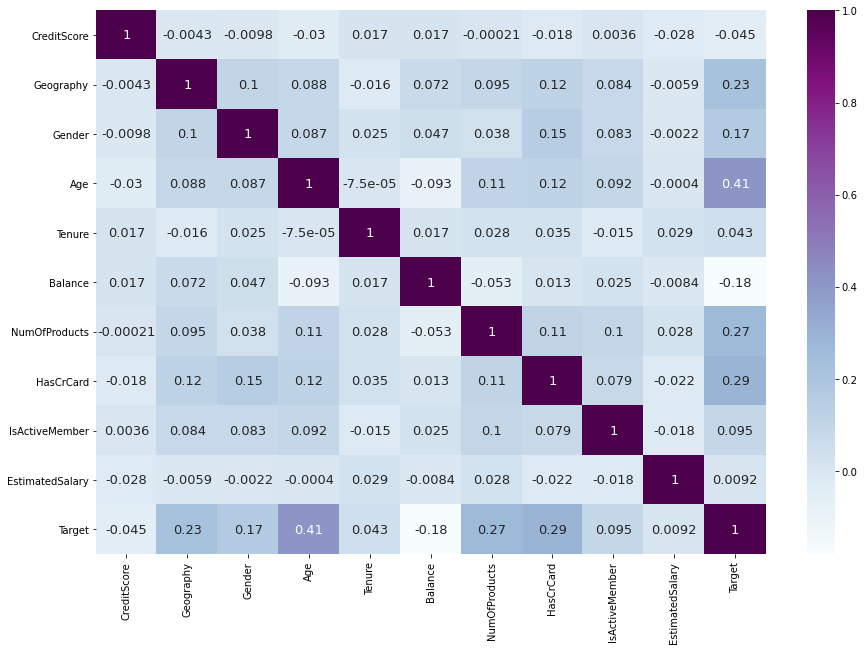

In [54]:
# Heatmap
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, annot=True, annot_kws={"size":13}, cmap="BuPu")
plt.show()

plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\Correlation_matrix.png')

There is a correlation between Age, Balance and Exited.

Scatter Matrix is another way to find relations or correlations between variables in a dataset effectively. 

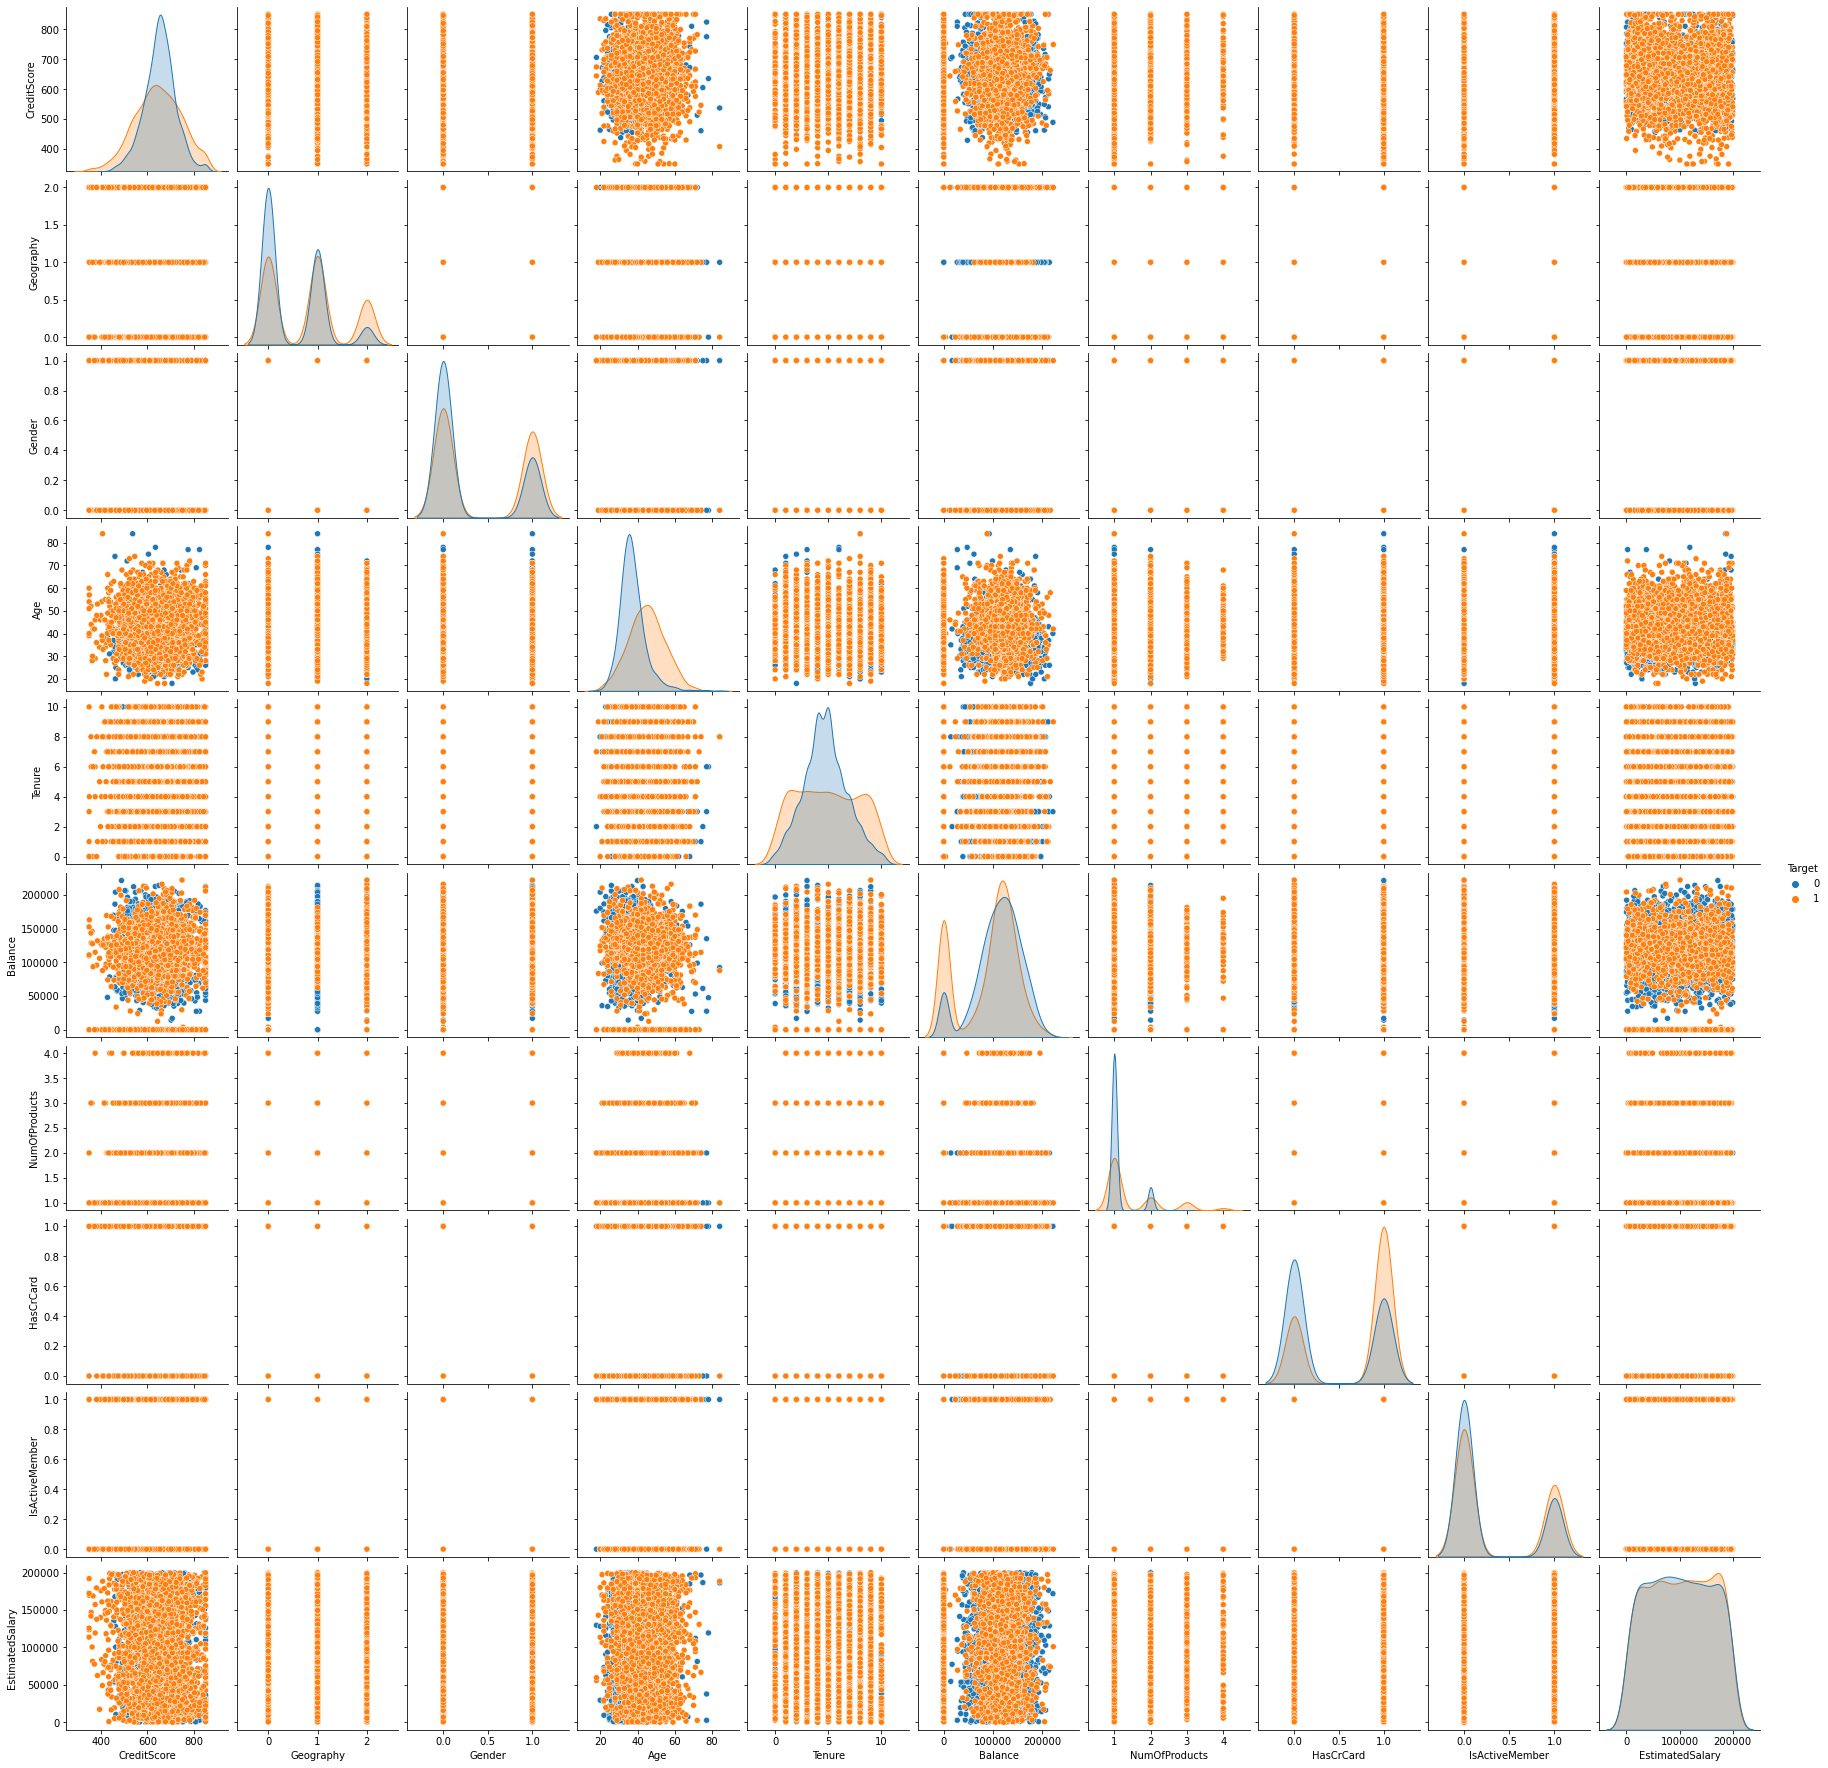

In [207]:
# 4. Scatter Matrix
import seaborn as sb 
sb.pairplot(data = data_new, hue = 'Target')
plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\Scatter_matrix.png')

Save the dataset

In [208]:
data_new.to_csv(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\churn_encoded.csv',  index = False)